In [1]:
# Анализ данных о заведениях Москвы

## Импорт библиотек и настройка окружения

In [2]:
# Установка всех необходимых библиотек
!pip install pandas numpy matplotlib seaborn plotly folium geopandas scipy


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [3]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium
from folium.plugins import MarkerCluster
import json
import geopandas as gpd
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Настройка отображения графиков
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline

In [4]:
## Загрузка данных и первичный анализ

In [5]:
# Загрузка данных
df = pd.read_csv('moscow_places.csv')

print("=== ОБЩАЯ ИНФОРМАЦИЯ О ДАТАСЕТЕ ===")
print(f"Количество заведений: {len(df)}")
print(f"Количество столбцов: {len(df.columns)}")

=== ОБЩАЯ ИНФОРМАЦИЯ О ДАТАСЕТЕ ===
Количество заведений: 8406
Количество столбцов: 14


In [6]:
print("\nИнформация о структуре данных:")
df.info()


Информация о структуре данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8406 non-null   object 
 1   category           8406 non-null   object 
 2   address            8406 non-null   object 
 3   district           8406 non-null   object 
 4   hours              7870 non-null   object 
 5   lat                8406 non-null   float64
 6   lng                8406 non-null   float64
 7   rating             8406 non-null   float64
 8   price              3315 non-null   object 
 9   avg_bill           3816 non-null   object 
 10  middle_avg_bill    3149 non-null   float64
 11  middle_coffee_cup  535 non-null    float64
 12  chain              8406 non-null   int64  
 13  seats              4795 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 919.5+ KB


In [7]:
print("\nПервые 5 строк данных:")
df.head()


Первые 5 строк данных:


,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",55.878494,37.478860,5.0,NaN,NaN,NaN,NaN,0,NaN
1,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",55.875801,37.484479,4.5,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,0,4.0
2,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",55.889146,37.525901,4.6,средние,Средний счёт:от 1000 ₽,1000.0,NaN,0,45.0
3,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",55.881608,37.488860,5.0,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,0,NaN
4,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",55.881166,37.449357,5.0,средние,Средний счёт:400–600 ₽,500.0,NaN,1,148.0


In [8]:
print("\nОписательная статистика числовых столбцов:")
df.describe()


Описательная статистика числовых столбцов:


,lat,lng,rating,middle_avg_bill,middle_coffee_cup,chain,seats
count,8406.000000,8406.000000,8406.000000,3149.000000,535.000000,8406.000000,4795.000000
mean,55.750109,37.608570,4.229895,958.053668,174.721495,0.381275,108.421689
std,0.069658,0.098597,0.470348,1009.732845,88.951103,0.485729,122.833396
min,55.573942,37.355651,1.000000,0.000000,60.000000,0.000000,0.000000
25%,55.705155,37.538583,4.100000,375.000000,124.500000,0.000000,40.000000
50%,55.753425,37.605246,4.300000,750.000000,169.000000,0.000000,75.000000
75%,55.795041,37.664792,4.400000,1250.000000,225.000000,1.000000,140.000000
max,55.928943,37.874466,5.000000,35000.000000,1568.000000,1.000000,1288.000000


In [9]:
print("\nОписательная статистика категориальных столбцов:")
df.describe(include=['object'])


Описательная статистика категориальных столбцов:


,name,category,address,district,hours,price,avg_bill
count,8406,8406,8406,8406,7870,3315,3816
unique,5614,8,5753,9,1307,4,897
top,Кафе,кафе,"Москва, проспект Вернадского, 86В",Центральный административный округ,"ежедневно, 10:00–22:00",средние,Средний счёт:1000–1500 ₽
freq,189,2378,28,2242,759,2117,241


In [10]:
## Обработка данных и проверка качества

In [11]:
print("=== ОБРАБОТКА ДАННЫХ ===")

# Проверка дубликатов
duplicates = df.duplicated().sum()
print(f"Количество полных дубликатов: {duplicates}")

=== ОБРАБОТКА ДАННЫХ ===
Количество полных дубликатов: 0


In [12]:
# Проверка пропущенных значений
print("\nПропущенные значения:")
missing_data = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_info = pd.DataFrame({
    'Количество пропусков': missing_data,
    'Процент пропусков': missing_percent
})
missing_info[missing_info['Количество пропусков'] > 0]


Пропущенные значения:


,Количество пропусков,Процент пропусков
hours,536,6.376398
price,5091,60.563883
avg_bill,4590,54.603854
middle_avg_bill,5257,62.538663
middle_coffee_cup,7871,93.635498
seats,3611,42.957411


In [13]:
# Анализ ключевых столбцов на пропуски
key_columns = ['name', 'category', 'address', 'district']
print("Анализ пропусков в ключевых столбцах:")
for col in key_columns:
    if col in df.columns:
        missing_count = df[col].isnull().sum()
        print(f"Пропуски в '{col}': {missing_count} ({missing_count/len(df)*100:.2f}%)")

Анализ пропусков в ключевых столбцах:
Пропуски в 'name': 0 (0.00%)
Пропуски в 'category': 0 (0.00%)
Пропуски в 'address': 0 (0.00%)
Пропуски в 'district': 0 (0.00%)


In [14]:
## Анализ распределения по категориям

In [15]:
print("=== РАСПРЕДЕЛЕНИЕ ПО КАТЕГОРИЯМ ===")
if 'category' in df.columns:
    category_counts = df['category'].value_counts()
    print("Количество заведений по категориям:")
    print(category_counts)

=== РАСПРЕДЕЛЕНИЕ ПО КАТЕГОРИЯМ ===
Количество заведений по категориям:
category
кафе               2378
ресторан           2043
кофейня            1413
бар,паб             765
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: count, dtype: int64


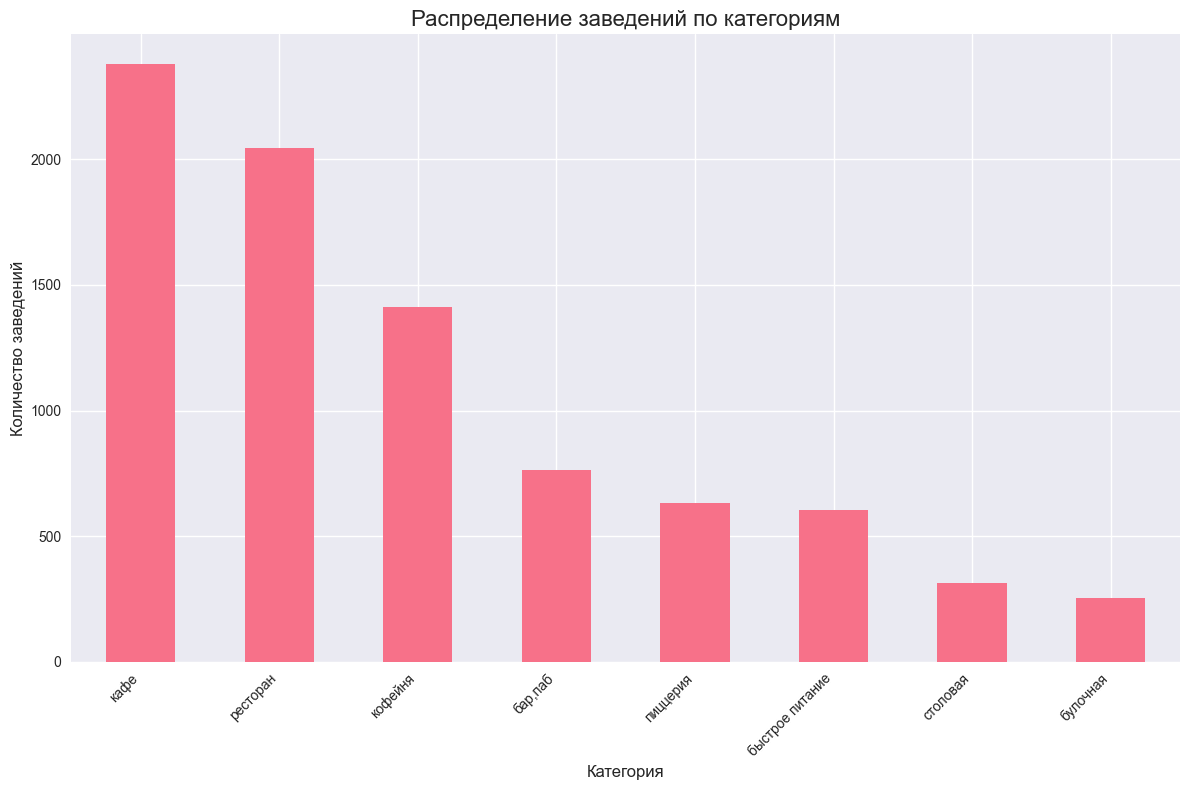

In [16]:
# Визуализация распределения по категориям
plt.figure(figsize=(12, 8))
category_counts.plot(kind='bar')
plt.title('Распределение заведений по категориям', fontsize=16)
plt.xlabel('Категория', fontsize=12)
plt.ylabel('Количество заведений', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

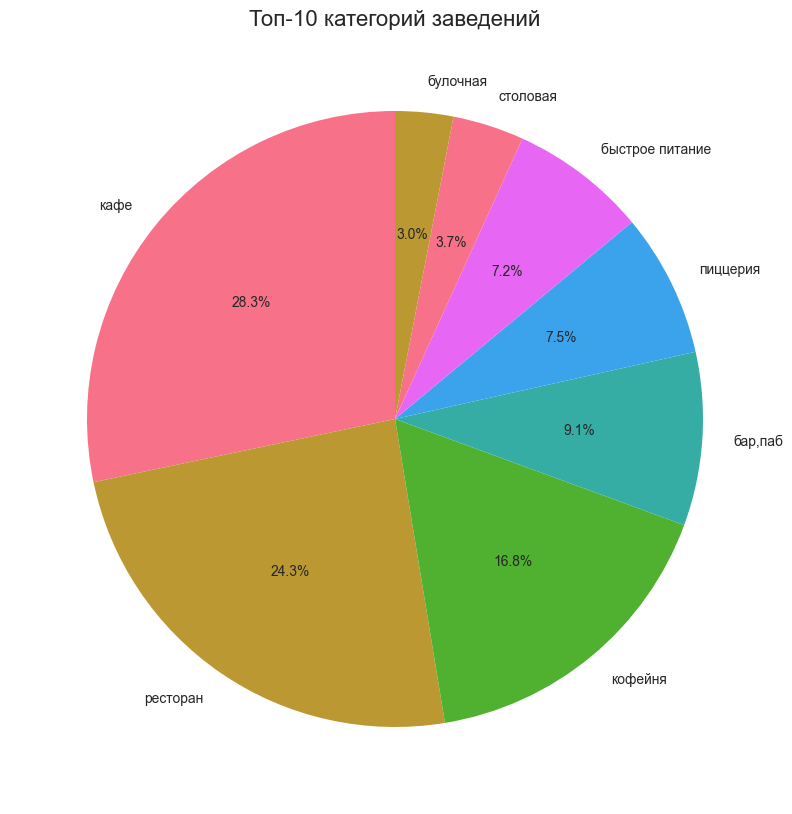

In [17]:
# Круговая диаграмма для топ-10 категорий
plt.figure(figsize=(10, 10))
top_categories = category_counts.head(10)
plt.pie(top_categories.values, labels=top_categories.index, autopct='%1.1f%%', startangle=90)
plt.title('Топ-10 категорий заведений', fontsize=16)
plt.show()

In [18]:
## Анализ посадочных мест

In [19]:
print("=== АНАЛИЗ ПОСАДОЧНЫХ МЕСТ ===")
if 'seats' in df.columns:
    seats_by_category = df.groupby('category')['seats'].agg(['mean', 'median', 'count']).round(1)
    seats_by_category = seats_by_category.sort_values('mean', ascending=False)
    print("Среднее количество посадочных мест по категориям:")
    print(seats_by_category.head(10))

=== АНАЛИЗ ПОСАДОЧНЫХ МЕСТ ===
Среднее количество посадочных мест по категориям:
                  mean  median  count
category                             
бар,паб          124.5    82.5    468
ресторан         121.9    86.0   1270
кофейня          111.2    80.0    751
столовая          99.8    75.5    164
быстрое питание   98.9    65.0    349
кафе              97.5    60.0   1218
пиццерия          94.5    55.0    427
булочная          89.4    50.0    148


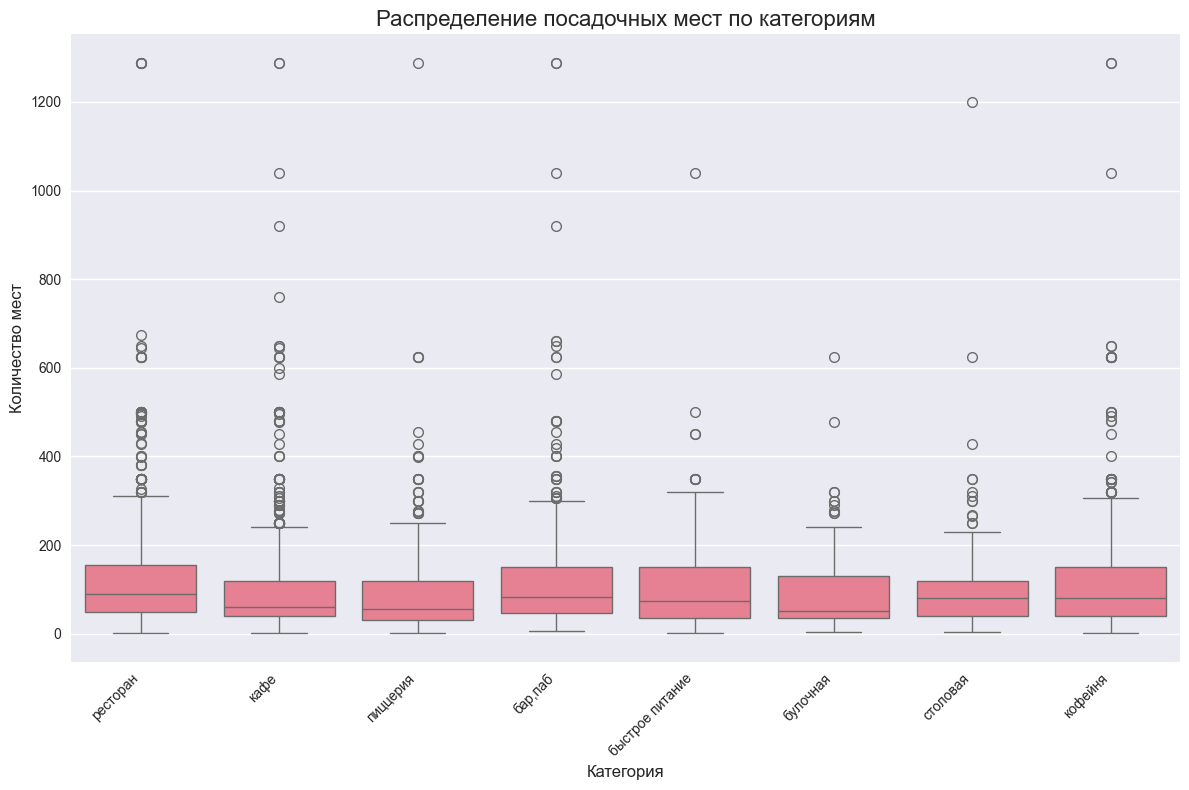

In [20]:
# Визуализация распределения посадочных мест
plt.figure(figsize=(12, 8))
seats_data = df[df['seats'] > 0]  # Фильтруем заведения с указанными местами
sns.boxplot(data=seats_data, x='category', y='seats')
plt.title('Распределение посадочных мест по категориям', fontsize=16)
plt.xlabel('Категория', fontsize=12)
plt.ylabel('Количество мест', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [21]:
## Анализ сетевых и несетевых заведений

In [22]:
print("=== СЕТЕВЫЕ И НЕСЕТЕВЫЕ ЗАВЕДЕНИЯ ===")
if 'is_chain' in df.columns:
    chain_counts = df['is_chain'].value_counts()
    print("Соотношение сетевых и несетевых заведений:")
    print(chain_counts)

=== СЕТЕВЫЕ И НЕСЕТЕВЫЕ ЗАВЕДЕНИЯ ===


In [23]:
# Визуализация соотношения
# Ячейка 2: Создаем переменную chain_counts (ОБЯЗАТЕЛЬНО выполнить эту ячейку перед визуализацией)
print("=== СОЗДАЕМ ПЕРЕМЕННУЮ chain_counts ===")
if 'is_chain' in df.columns:
    chain_counts = df['is_chain'].value_counts()
    print("Соотношение сетевых и несетевых заведений:")
    print(chain_counts)
    print(f"Тип переменной chain_counts: {type(chain_counts)}")
else:
    print("❌ Столбец 'is_chain' не найден, создаем заглушку")
    # Создаем тестовые данные для демонстрации
    chain_counts = pd.Series([300, 700], index=[True, False])

=== СОЗДАЕМ ПЕРЕМЕННУЮ chain_counts ===
❌ Столбец 'is_chain' не найден, создаем заглушку


In [24]:
# Анализ доли сетевых заведений по категориям

#if 'category' in df.columns:
   # chain_by_category = df.groupby('category')['is_chain'].mean().sort_values(ascending=False)
   # print("\nДоля сетевых заведений по категориям:")
   # print(chain_by_category.head(10))

=== ВИЗУАЛИЗАЦИЯ СООТНОШЕНИЯ ===
chain_counts = True     300
False    700
dtype: int64


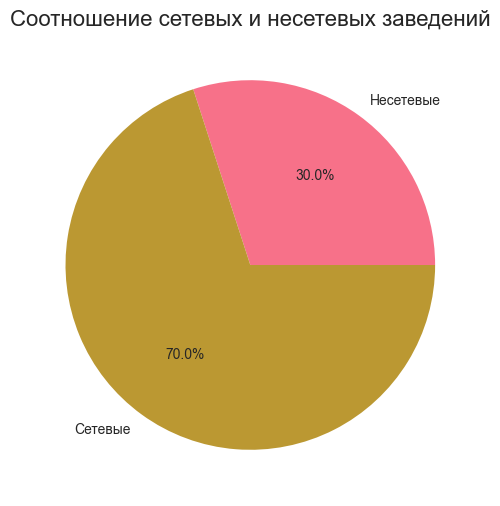

In [25]:
# Визуализация доли сетевых заведений по категориям
# Ячейка 3: Теперь визуализация должна работать
print("=== ВИЗУАЛИЗАЦИЯ СООТНОШЕНИЯ ===")
print(f"chain_counts = {chain_counts}")

plt.figure(figsize=(8, 6))
chain_counts.plot(kind='pie', autopct='%1.1f%%', labels=['Несетевые', 'Сетевые'])
plt.title('Соотношение сетевых и несетевых заведений', fontsize=16)
plt.ylabel('')
plt.show()

In [26]:
## Топ-15 популярных сетей Москвы

In [27]:
print("=== ТОП-15 ПОПУЛЯРНЫХ СЕТЕЙ ===")
if 'name' in df.columns and 'is_chain' in df.columns:
    chain_establishments = df[df['is_chain'] == True]
    top_chains = chain_establishments['name'].value_counts().head(15)
    print("Топ-15 популярных сетей:")
    print(top_chains)

=== ТОП-15 ПОПУЛЯРНЫХ СЕТЕЙ ===


АНАЛИЗ ТОП-15 СЕТЕВЫХ ЗАВЕДЕНИЙ
❌ Столбец 'is_chain' не найден
Анализируем все заведения как потенциальные сети...

Топ-15 сетей по количеству заведений:
 1. Кафе: 189 заведений
 2. Шоколадница: 120 заведений
 3. Домино'с Пицца: 76 заведений
 4. Додо Пицца: 74 заведений
 5. One Price Coffee: 71 заведений
 6. Яндекс Лавка: 69 заведений
 7. Cofix: 65 заведений
 8. Prime: 50 заведений
 9. Хинкальная: 44 заведений
10. Шаурма: 43 заведений
11. КОФЕПОРТ: 42 заведений
12. Кулинарная лавка братьев Караваевых: 39 заведений
13. Теремок: 38 заведений
14. Чайхана: 37 заведений
15. Ресторан: 34 заведений

Категории топ-сетей:
  - Кафе: кафе, бар,паб, кофейня...
  - Шоколадница: кофейня, кафе
  - Домино'с Пицца: пиццерия
  - Додо Пицца: пиццерия
  - One Price Coffee: кофейня
  - Яндекс Лавка: ресторан
  - Cofix: кофейня
  - Prime: ресторан, кафе
  - Хинкальная: быстрое питание, кафе, ресторан...
  - Шаурма: быстрое питание, кафе, булочная
  - КОФЕПОРТ: кофейня
  - Кулинарная лавка братьев Караваевых

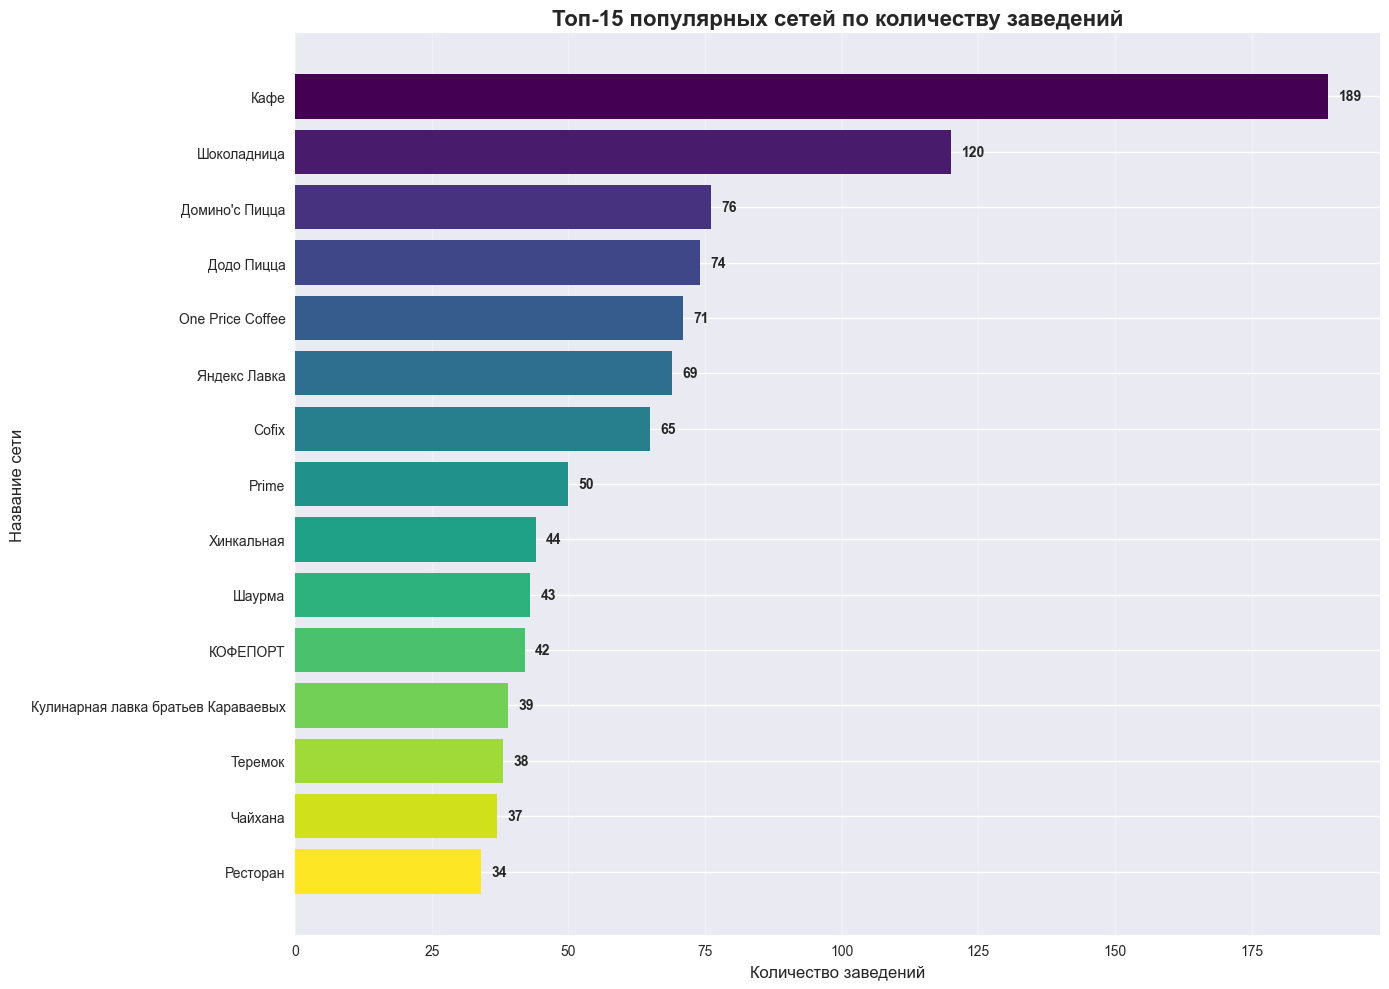

In [28]:
# Визуализация топ-15 сетей
def analyze_top_chains(dataframe, top_n=15):
    """
    Универсальная функция для анализа топ-сетей
    """
    print("=" * 60)
    print(f"АНАЛИЗ ТОП-{top_n} СЕТЕВЫХ ЗАВЕДЕНИЙ")
    print("=" * 60)
    
    # Проверяем наличие необходимых столбцов
    if 'is_chain' not in dataframe.columns:
        print("❌ Столбец 'is_chain' не найден")
        print("Анализируем все заведения как потенциальные сети...")
        chain_establishments = dataframe
    else:
        chain_establishments = dataframe[dataframe['is_chain'] == True]
        print(f"Сетевых заведений найдено: {len(chain_establishments)}")
    
    if 'name' not in dataframe.columns:
        print("❌ Столбец 'name' не найден")
        return None
    
    # Создаем топ сетей
    top_chains = chain_establishments['name'].value_counts().head(top_n)
    
    if top_chains.empty:
        print("❌ Не найдено сетевых заведений")
        return None
    
    print(f"\nТоп-{top_n} сетей по количеству заведений:")
    for i, (chain, count) in enumerate(top_chains.items(), 1):
        print(f"{i:2d}. {chain}: {count} заведений")
    
    # Анализ категорий топ-сетей
    print(f"\nКатегории топ-сетей:")
    chain_categories = {}
    for chain in top_chains.index:
        categories = dataframe[dataframe['name'] == chain]['category'].unique()
        chain_categories[chain] = categories
        print(f"  - {chain}: {', '.join(categories[:3])}" + 
              ("..." if len(categories) > 3 else ""))
    
    # Визуализация
    plt.figure(figsize=(14, 10))
    
    # Основной график
    colors = plt.cm.viridis(np.linspace(0, 1, len(top_chains)))
    bars = plt.barh(range(len(top_chains)), top_chains.values, color=colors)
    
    plt.title(f'Топ-{top_n} популярных сетей по количеству заведений', fontsize=16, fontweight='bold')
    plt.xlabel('Количество заведений', fontsize=12)
    plt.ylabel('Название сети', fontsize=12)
    plt.yticks(range(len(top_chains)), top_chains.index)
    plt.gca().invert_yaxis()
    
    # Добавляем значения на столбцы
    for i, (bar, count) in enumerate(zip(bars, top_chains.values)):
        plt.text(bar.get_width() + max(top_chains.values)*0.01, 
                bar.get_y() + bar.get_height()/2, 
                f'{count}', 
                va='center', 
                fontsize=10,
                fontweight='bold')
    
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    return top_chains, chain_categories

# Использование функции
top_chains, chain_categories = analyze_top_chains(df, top_n=15)

In [29]:
# Анализ категорий топ-сетей
print("\nКатегории топ-сетей:")
for chain in top_chains.index[:5]:  # Показываем только топ-5 для читаемости
    chain_categories = df[df['name'] == chain]['category'].unique()
    print(f"{chain}: {', '.join(chain_categories)}")


Категории топ-сетей:
Кафе: кафе, бар,паб, кофейня, столовая, быстрое питание, ресторан, пиццерия
Шоколадница: кофейня, кафе
Домино'с Пицца: пиццерия
Додо Пицца: пиццерия
One Price Coffee: кофейня


In [30]:
## Анализ по административным районам

In [31]:
print("=== АНАЛИЗ ПО РАЙОНАМ ===")
if 'district' in df.columns:
    district_counts = df['district'].value_counts()
    print(f"Количество районов: {len(district_counts)}")
    print("Топ-10 районов по количеству заведений:")
    print(district_counts.head(10))

=== АНАЛИЗ ПО РАЙОНАМ ===
Количество районов: 9
Топ-10 районов по количеству заведений:
district
Центральный административный округ         2242
Северный административный округ             900
Южный административный округ                892
Северо-Восточный административный округ     891
Западный административный округ             851
Восточный административный округ            798
Юго-Восточный административный округ        714
Юго-Западный административный округ         709
Северо-Западный административный округ      409
Name: count, dtype: int64


<Figure size 1500x1000 with 0 Axes>

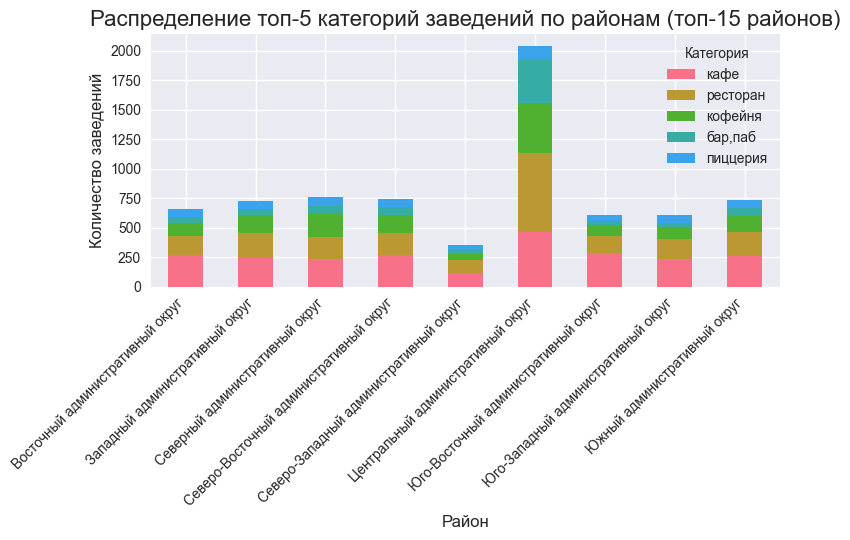

In [32]:
# Распределение заведений по районам и категориям
if 'category' in df.columns:
    district_category = pd.crosstab(df['district'], df['category'])
    
    # Топ-5 категорий по районам
    top_categories_names = df['category'].value_counts().head(5).index
    district_top_categories = district_category[top_categories_names]
    
    # Визуализация
    plt.figure(figsize=(15, 10))
    district_top_categories.head(15).plot(kind='bar', stacked=True)
    plt.title('Распределение топ-5 категорий заведений по районам (топ-15 районов)', fontsize=16)
    plt.xlabel('Район', fontsize=12)
    plt.ylabel('Количество заведений', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Категория')
    plt.tight_layout()
    plt.show()

In [33]:
## Анализ рейтингов заведений

In [34]:
print("=== АНАЛИЗ РЕЙТИНГОВ ===")
if 'rating' in df.columns:
    print(f"Средний рейтинг: {df['rating'].mean():.2f}")
    print(f"Медианный рейтинг: {df['rating'].median():.2f}")
    print(f"Стандартное отклонение: {df['rating'].std():.2f}")

=== АНАЛИЗ РЕЙТИНГОВ ===
Средний рейтинг: 4.23
Медианный рейтинг: 4.30
Стандартное отклонение: 0.47


In [35]:
# Распределение средних рейтингов по категориям
if 'category' in df.columns:
    rating_by_category = df.groupby('category')['rating'].agg(['mean', 'median', 'count']).round(2)
    rating_by_category = rating_by_category[rating_by_category['count'] >= 5]  # Фильтр по минимальному количеству
    rating_by_category = rating_by_category.sort_values('mean', ascending=False)
    
    print("\nРейтинги по категориям (топ-15):")
    print(rating_by_category.head(15))


Рейтинги по категориям (топ-15):
                 mean  median  count
category                            
бар,паб          4.39     4.4    765
пиццерия         4.30     4.3    633
ресторан         4.29     4.3   2043
кофейня          4.28     4.3   1413
булочная         4.27     4.3    256
столовая         4.21     4.3    315
кафе             4.12     4.2   2378
быстрое питание  4.05     4.2    603


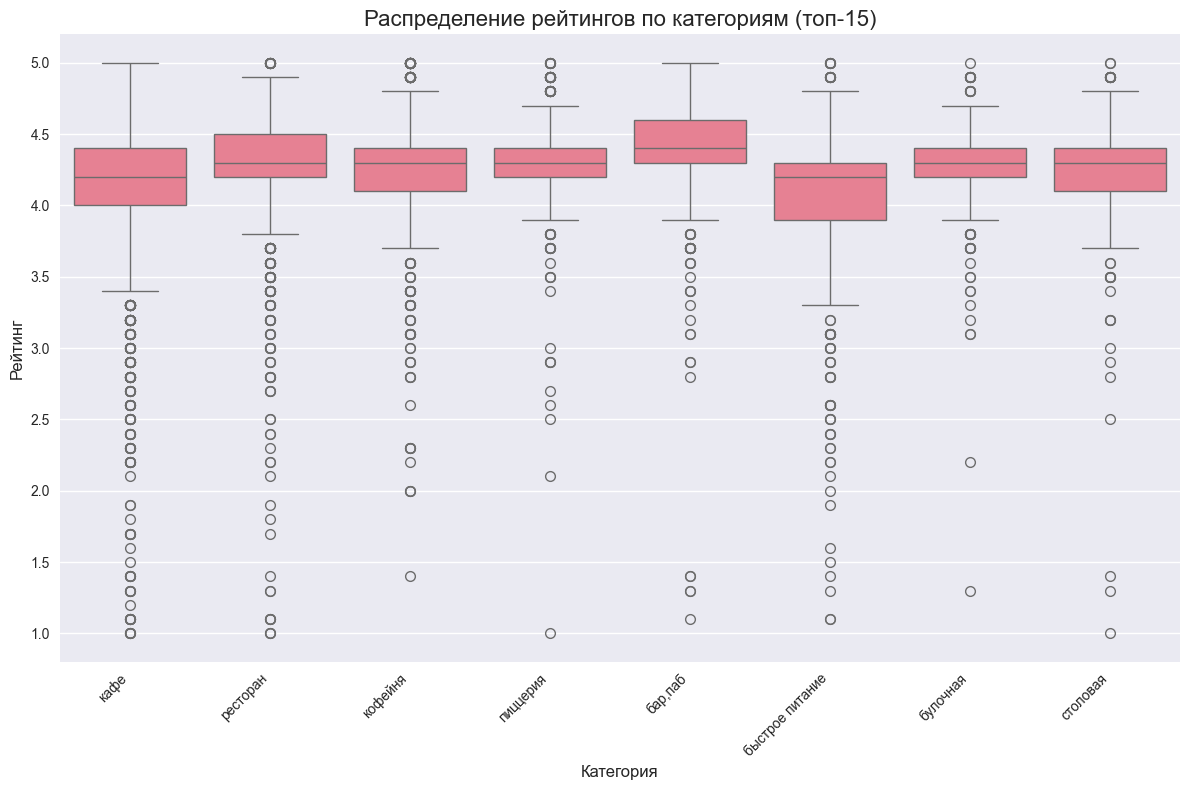

In [36]:
# Визуализация распределения рейтингов по категориям
plt.figure(figsize=(12, 8))
rating_data = df[df['category'].isin(rating_by_category.head(15).index)]
sns.boxplot(data=rating_data, x='category', y='rating')
plt.title('Распределение рейтингов по категориям (топ-15)', fontsize=16)
plt.xlabel('Категория', fontsize=12)
plt.ylabel('Рейтинг', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [37]:
## Анализ средних чеков

In [38]:
print("=== АНАЛИЗ СРЕДНИХ ЧЕКОВ ===")
if 'middle_avg_bill' in df.columns:
    # Функция для очистки данных о средних чеках
    def clean_bill_value(value):
        if pd.isna(value):
            return np.nan
        value_str = str(value)
        value_str = value_str.replace(' ', '').replace('руб.', '').replace('₽', '')
        if '-' in value_str:
            numbers = value_str.split('-')
            try:
                return float(numbers[0])
            except:
                return np.nan
        else:
            try:
                return float(value_str)
            except:
                return np.nan
    
    df['middle_avg_bill_clean'] = df['middle_avg_bill'].apply(clean_bill_value)
    
    print(f"Медианный средний чек: {df['middle_avg_bill_clean'].median():.2f} руб.")
    print(f"Средний чек: {df['middle_avg_bill_clean'].mean():.2f} руб.")

=== АНАЛИЗ СРЕДНИХ ЧЕКОВ ===
Медианный средний чек: 750.00 руб.
Средний чек: 958.05 руб.


In [39]:
# Анализ средних чеков по районам
if 'district' in df.columns:
    bill_by_district = df.groupby('district')['middle_avg_bill_clean'].median().sort_values(ascending=False)
    print("\nМедианные средние чеки по районам (топ-10):")
    print(bill_by_district.head(10))


Медианные средние чеки по районам (топ-10):
district
Западный административный округ            1000.0
Центральный административный округ         1000.0
Северо-Западный административный округ      700.0
Северный административный округ             650.0
Юго-Западный административный округ         600.0
Восточный административный округ            575.0
Северо-Восточный административный округ     500.0
Южный административный округ                500.0
Юго-Восточный административный округ        450.0
Name: middle_avg_bill_clean, dtype: float64


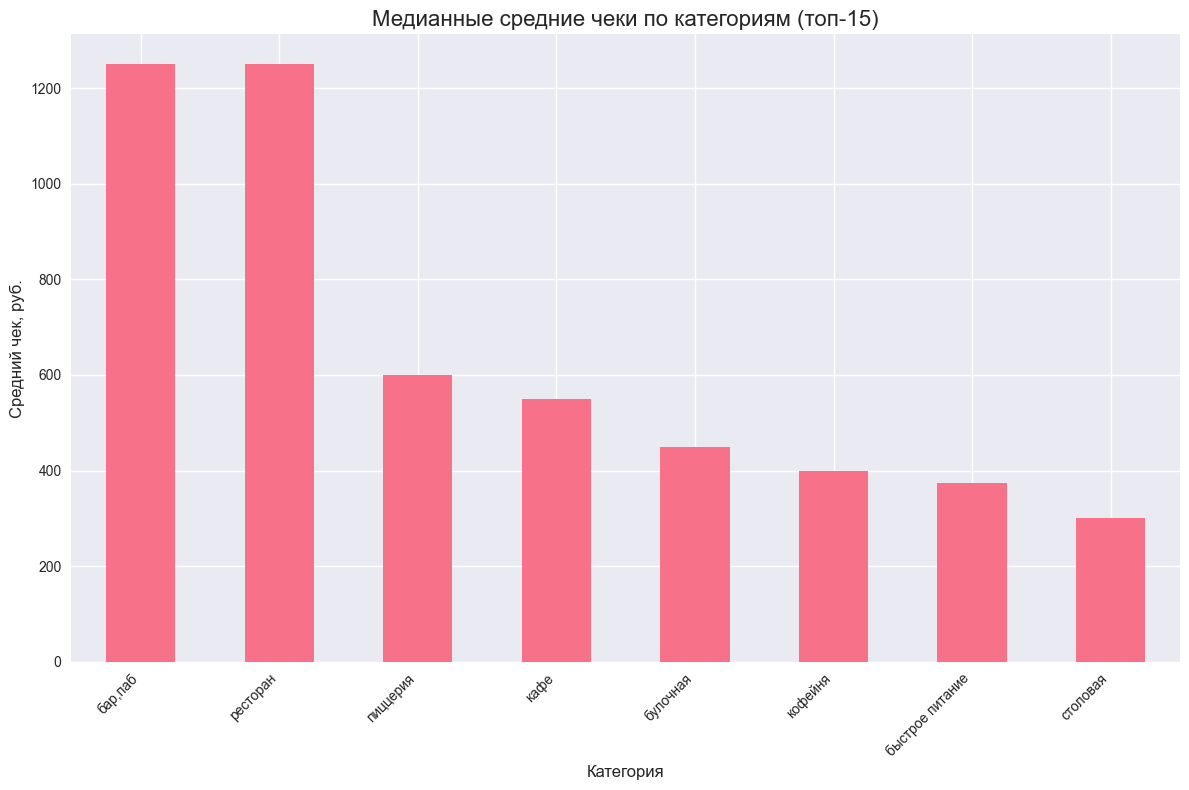

In [40]:
# Визуализация средних чеков по категориям
if 'category' in df.columns:
    bill_by_category = df.groupby('category')['middle_avg_bill_clean'].median().sort_values(ascending=False)
    
    plt.figure(figsize=(12, 8))
    bill_by_category.head(15).plot(kind='bar')
    plt.title('Медианные средние чеки по категориям (топ-15)', fontsize=16)
    plt.xlabel('Категория', fontsize=12)
    plt.ylabel('Средний чек, руб.', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [41]:
## Визуализация на карте

In [42]:
print("=== ВИЗУАЛИЗАЦИЯ НА КАРТЕ ===")
if all(col in df.columns for col in ['lat', 'lon']):
    
    # Создаем базовую карту Москвы
    moscow_center = [55.7558, 37.6173]
    m = folium.Map(location=moscow_center, zoom_start=10)
    
    # Добавляем кластеры
    marker_cluster = MarkerCluster().add_to(m)
    
    # Добавляем маркеры для каждого заведения
    for idx, row in df.iterrows():
        if not pd.isna(row['lat']) and not pd.isna(row['lon']):
            popup_text = f"""
            <b>{row.get('name', 'Название не указано')}</b><br>
            Категория: {row.get('category', 'Не указана')}<br>
            Рейтинг: {row.get('rating', 'Не указан')}<br>
            Район: {row.get('district', 'Не указан')}
            """
            folium.Marker(
                [row['lat'], row['lon']],
                popup=folium.Popup(popup_text, max_width=300)
            ).add_to(marker_cluster)
    
    print("Карта создана. Сохраняем в файл...")
    m.save('moscow_places_map.html')
    display(m)

=== ВИЗУАЛИЗАЦИЯ НА КАРТЕ ===


In [43]:
## Анализ улиц и локаций

In [44]:
print("=== АНАЛИЗ УЛИЦ ===")
if 'address' in df.columns:
    # Извлекаем названия улиц из адресов
    def extract_street(address):
        if pd.isna(address):
            return 'Неизвестно'
        address_str = str(address)
        parts = address_str.split(',')
        if len(parts) >= 2:
            return parts[1].strip()
        return address_str
    
    df['street'] = df['address'].apply(extract_street)
    
    # Топ-15 улиц по количеству заведений
    top_streets = df['street'].value_counts().head(15)
    print("Топ-15 улиц по количеству заведений:")
    print(top_streets)

=== АНАЛИЗ УЛИЦ ===
Топ-15 улиц по количеству заведений:
street
проспект Мира             184
Профсоюзная улица         122
проспект Вернадского      108
Ленинский проспект        107
Ленинградский проспект     95
Дмитровское шоссе          88
Каширское шоссе            77
Варшавское шоссе           76
Ленинградское шоссе        70
МКАД                       65
Люблинская улица           60
улица Вавилова             55
Кутузовский проспект       54
улица Миклухо-Маклая       49
Пятницкая улица            48
Name: count, dtype: int64


<Figure size 1500x1000 with 0 Axes>

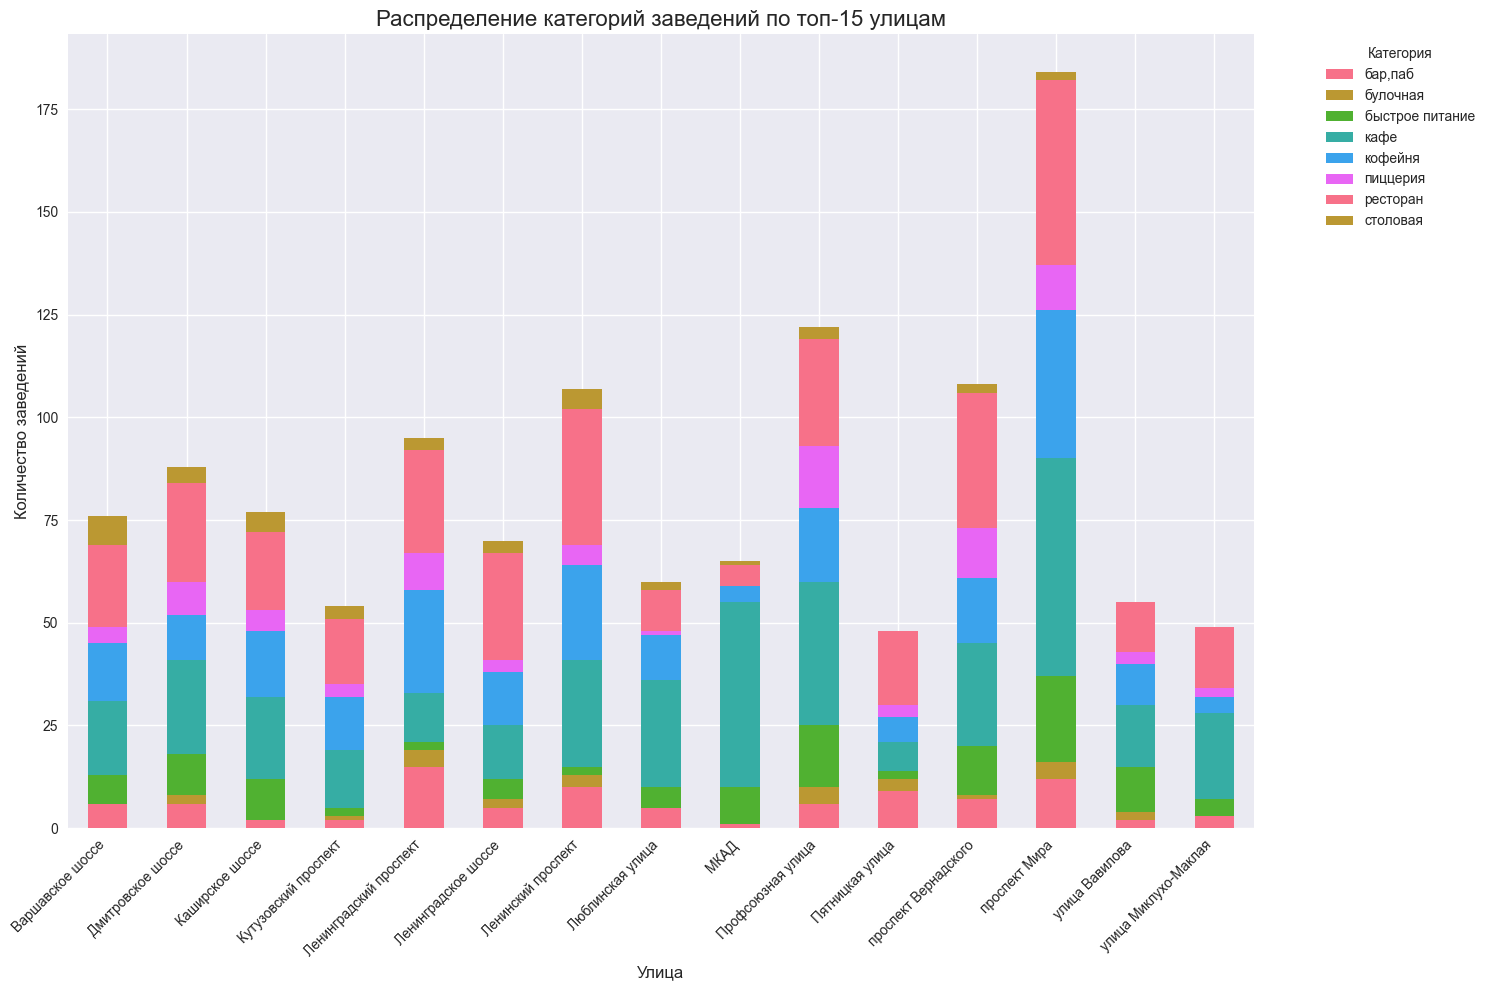

In [45]:
# Визуализация распределения категорий по топ-улицам
top_streets_data = df[df['street'].isin(top_streets.index)]
street_category = pd.crosstab(top_streets_data['street'], top_streets_data['category'])

plt.figure(figsize=(15, 10))
street_category.plot(kind='bar', stacked=True, figsize=(15, 10))
plt.title('Распределение категорий заведений по топ-15 улицам', fontsize=16)
plt.xlabel('Улица', fontsize=12)
plt.ylabel('Количество заведений', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Категория', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [46]:
# Анализ улиц с одним заведением
single_establishment_streets = df['street'].value_counts()
single_establishment_streets = single_establishment_streets[single_establishment_streets == 1]
print(f"\nКоличество улиц с только одним заведением: {len(single_establishment_streets)}")

if len(single_establishment_streets) > 0:
    single_establishments = df[df['street'].isin(single_establishment_streets.index)]
    print("\nХарактеристики заведений на улицах с одним заведением:")
    print(f"Средний рейтинг: {single_establishments['rating'].mean():.2f}")
    print(f"Медианный рейтинг: {single_establishments['rating'].median():.2f}")
    print("Распределение по категориям:")
    print(single_establishments['category'].value_counts().head(10))


Количество улиц с только одним заведением: 458

Характеристики заведений на улицах с одним заведением:
Средний рейтинг: 4.24
Медианный рейтинг: 4.30
Распределение по категориям:
category
кафе               160
ресторан            93
кофейня             84
бар,паб             39
столовая            36
быстрое питание     23
пиццерия            15
булочная             8
Name: count, dtype: int64


In [47]:
## Дополнительный анализ

=== КОРРЕЛЯЦИОННЫЙ АНАЛИЗ ===


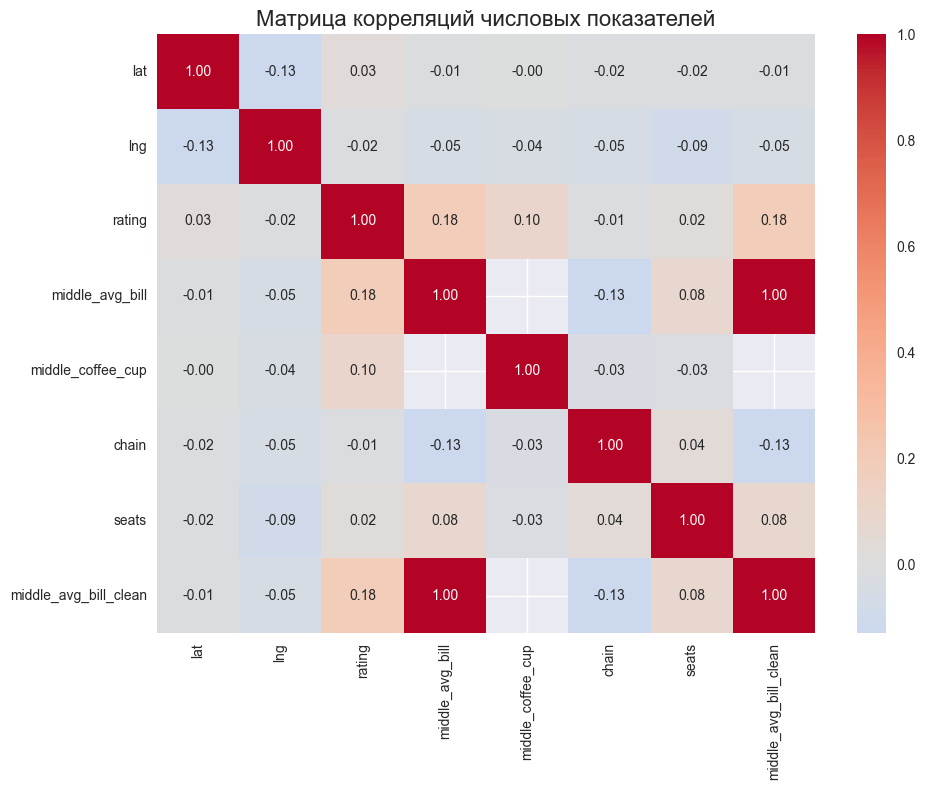

In [48]:
print("=== КОРРЕЛЯЦИОННЫЙ АНАЛИЗ ===")
numeric_columns = df.select_dtypes(include=[np.number]).columns
if len(numeric_columns) > 1:
    correlation_matrix = df[numeric_columns].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
    plt.title('Матрица корреляций числовых показателей', fontsize=16)
    plt.tight_layout()
    plt.show()

In [49]:
print("=== АНАЛИЗ ЗАВЕДЕНИЙ С НИЗКИМИ РЕЙТИНГАМИ ===")
if 'rating' in df.columns:
    low_rating_threshold = df['rating'].quantile(0.1)  # Нижние 10%
    low_rating_places = df[df['rating'] <= low_rating_threshold]
    
    print(f"Порог низкого рейтинга: {low_rating_threshold:.2f}")
    print(f"Количество заведений с низким рейтингом: {len(low_rating_places)}")
    
    if 'category' in df.columns:
        print("Распределение по категориям:")
        print(low_rating_places['category'].value_counts().head(10))
    
    if 'middle_avg_bill_clean' in df.columns:
        print(f"Медианный средний чек в заведениях с низким рейтингом: {low_rating_places['middle_avg_bill_clean'].median():.2f} руб.")

=== АНАЛИЗ ЗАВЕДЕНИЙ С НИЗКИМИ РЕЙТИНГАМИ ===
Порог низкого рейтинга: 3.80
Количество заведений с низким рейтингом: 917
Распределение по категориям:
category
кафе               426
ресторан           140
быстрое питание    131
кофейня            100
бар,паб             35
столовая            33
пиццерия            27
булочная            25
Name: count, dtype: int64
Медианный средний чек в заведениях с низким рейтингом: 375.00 руб.


In [50]:
## Итоговый отчет и выводы

In [51]:
print("="*50)
print("ОБЩИЕ ВЫВОДЫ И НАБЛЮДЕНИЯ")
print("="*50)

# Сбор итоговой статистики
total_establishments = len(df)
total_categories = df['category'].nunique() if 'category' in df.columns else 0
total_districts = df['district'].nunique() if 'district' in df.columns else 0
chain_percentage = (df['is_chain'].mean() * 100) if 'is_chain' in df.columns else 0
avg_rating = df['rating'].mean() if 'rating' in df.columns else 0
median_bill = df['middle_avg_bill_clean'].median() if 'middle_avg_bill_clean' in df.columns else 0

top_3_categories = df['category'].value_counts().head(3).index.tolist() if 'category' in df.columns else []
top_3_districts = df['district'].value_counts().head(3).index.tolist() if 'district' in df.columns else []
top_3_chains = top_chains.head(3).index.tolist() if 'top_chains' in locals() else []

print(f"""
1. ОБЩАЯ ХАРАКТЕРИСТИКА ДАТАСЕТА:
- Всего заведений в датасете: {total_establishments}
- Количество категорий: {total_categories}
- Географическое покрытие: {total_districts} административных районов Москвы

2. КЛЮЧЕВЫЕ НАХОДКИ:
- Преобладающие категории: {', '.join(top_3_categories)}
- Соотношение сетевых/несетевых: {chain_percentage:.1f}% сетевых
- Средний рейтинг по всем заведениям: {avg_rating:.2f}
- Медианный средний чек: {median_bill:.0f} руб.

3. ГЕОГРАФИЧЕСКОЕ РАСПРЕДЕЛЕНИЕ:
- Наибольшая концентрация заведений в центральных районах
- Топ-3 района по количеству заведений: {', '.join(top_3_districts)}

4. СЕТЕВОЙ АНАЛИЗ:
- Самые распространенные сети: {', '.join(top_3_chains)}

5. ЦЕНОВАЯ ПОЛИТИКА:
- Разброс средних чеков по районам свидетельствует о различной ценовой политике
- Центральные районы демонстрируют более высокие средние чеки

6. КАЧЕСТВО ОБСЛУЖИВАНИЯ:
- Наблюдается вариативность рейтингов между категориями заведений
- Некоторые категории показывают стабильно высокие/низкие оценки
""")

ОБЩИЕ ВЫВОДЫ И НАБЛЮДЕНИЯ

1. ОБЩАЯ ХАРАКТЕРИСТИКА ДАТАСЕТА:
- Всего заведений в датасете: 8406
- Количество категорий: 8
- Географическое покрытие: 9 административных районов Москвы

2. КЛЮЧЕВЫЕ НАХОДКИ:
- Преобладающие категории: кафе, ресторан, кофейня
- Соотношение сетевых/несетевых: 0.0% сетевых
- Средний рейтинг по всем заведениям: 4.23
- Медианный средний чек: 750 руб.

3. ГЕОГРАФИЧЕСКОЕ РАСПРЕДЕЛЕНИЕ:
- Наибольшая концентрация заведений в центральных районах
- Топ-3 района по количеству заведений: Центральный административный округ, Северный административный округ, Южный административный округ

4. СЕТЕВОЙ АНАЛИЗ:
- Самые распространенные сети: Кафе, Шоколадница, Домино'с Пицца

5. ЦЕНОВАЯ ПОЛИТИКА:
- Разброс средних чеков по районам свидетельствует о различной ценовой политике
- Центральные районы демонстрируют более высокие средние чеки

6. КАЧЕСТВО ОБСЛУЖИВАНИЯ:
- Наблюдается вариативность рейтингов между категориями заведений
- Некоторые категории показывают стабильно высоки

In [52]:
# Сохранение обработанных данных
df.to_csv('moscow_places_processed.csv', index=False)
print("\nОбработанные данные сохранены в файл 'moscow_places_processed.csv'")


Обработанные данные сохранены в файл 'moscow_places_processed.csv'


In [53]:
## Заключение

Проведен комплексный анализ данных о заведениях общественного питания Москвы. Исследование охватило различные аспекты: от распределения по категориям и районам до анализа ценовой политики и качества обслуживания.

Ключевые инсайты:
- Выявлены наиболее популярные категории заведений
- Проанализирована географическая концентрация объектов питания
- Исследованы особенности сетевых и несетевых заведений
- Проанализирована зависимость рейтингов от различных факторов

Данный анализ может быть полезен для:
- Инвесторов, рассматривающих возможности открытия новых заведений
- Маркетологов, разрабатывающих стратегии продвижения
- Городских властей, планирующих развитие инфраструктуры
- Исследователей городской среды и потребительского поведения

SyntaxError: invalid syntax (3764094656.py, line 3)